In [1]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np
import matplotlib.pyplot as plt
from mediapipe import solutions #el tespiti için görsel işleme görevleri
from mediapipe.framework.formats import landmark_pb2 # landmark_pb2 formatı cinsinden verileri almak için

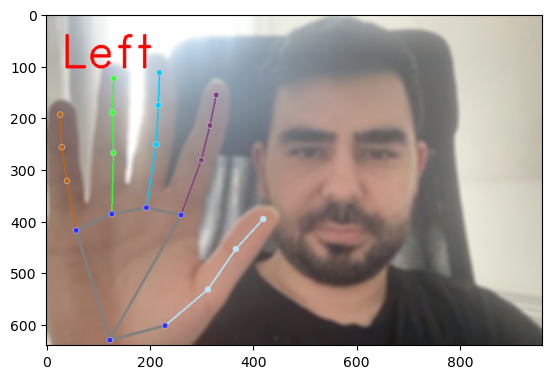

In [26]:
def draw_landmarks_on_image(rgb_image,detection_result):    
    hand_landmarks_list = detection_result.hand_landmarks # tespit edilen elin işaretlemelerini içeriri
    handedness_list = detection_result.handedness #tespit edilen elin sağ veya sol olma durunu
    annotated_image = np.copy(rgb_image) # girdi görüntüsü kopyalanır.
    
    #tespit edilen elleri işaretlemek için bir döngü oluşturulur.
    for idx in range(len(hand_landmarks_list)):
        hand_landmarks = hand_landmarks_list[idx] # indexi kullanarak el işaretlemelerini alır.
        handedness = handedness_list[idx] #indexi kullanarak hangi elin tespit edildiği
        
        hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList() # Landmark_pb2 formatında bir liste oluşturur
        hand_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x,y=landmark.y,z=landmark.z) for landmark in hand_landmarks])
        solutions.drawing_utils.draw_landmarks( #el işaretlemeleri görüntü üzerine çizilir
            annotated_image,
            hand_landmarks_proto,
            solutions.hands.HAND_CONNECTIONS,
            solutions.drawing_styles.get_default_hand_landmarks_style(),
            solutions.drawing_styles.get_default_hand_connections_style())
        
        
        height,width,_ = annotated_image.shape
        x_coordinates = [landmark.x for landmark in hand_landmarks]
        y_coordinates = [landmark.y for landmark in hand_landmarks]
        text_x = int(min(x_coordinates)*width)
        text_y = int(min(y_coordinates)*height)-MARGIN
        
        cv2.putText(annotated_image,f"{handedness[0].category_name}",(text_x,text_y),cv2.FONT_HERSHEY_DUPLEX,
                   FONT_SIZE,HANDEDNESS_TEXT_COLOR,FONT_THICKNESS,cv2.LINE_AA)
        
        return annotated_image


if __name__=='__main__':

    # elinizi içeren resmi (el_tespiti_1.jpg) open cv ile yüklenir.
    image = cv2.imread("el_ornek_2.jpg")

    ### resmi RGB formatına çeviriniz. ###
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

    ### resim yüksekliğini 960 genişliğini 640 olarak düzenleyiniz. ###
    image = cv2.resize(image,(960,640))

    ### resim üzerine 10*10 blur ekleyiniz. ###
    image = cv2.blur(image,(10,10))


    ### BGR formatından RGB formatına resmi çeviriniz. ###
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

    ### resimi data klasörü altına "el_tespit_odev.jpg" olarak kaydediniz. ###
    cv2.imwrite("el_tespit_odev.jpg",image)

    # el_tespit_odev.jpg resmini mediapipe kütüphanesi üzerinden okunur. 
    image = mp.Image.create_from_file("el_tespit_odev.jpg")

    MARGIN=10 #metnin üst köşesinden elin sınırına olan mesafe
    FONT_SIZE = 3 #yazı tipi boyutu
    FONT_THICKNESS = 2 #yazı kalınlığı
    HANDEDNESS_TEXT_COLOR = (255,0,0) #  kırmızı renk 

    base_options = python.BaseOptions(model_asset_path="hand_landmarker.task")
    options=vision.HandLandmarkerOptions(base_options=base_options,num_hands=2)
    detector = vision.HandLandmarker.create_from_options(options)

    ### resimin detect(el tespit edilmiş vektörize halini) oluşturun ###
    detection_result = detector.detect(image)

    ### resimin el tespiti yapılmış görsel halini hesaplayın ###
    annotated_image = draw_landmarks_on_image(image.numpy_view(),detection_result)
    plt.figure()
    plt.imshow(annotated_image)

    ### resimin el tespiti yapılmış görsel halini BGR formatına çevirin  ###
    annotated_image=cv2.cvtColor(annotated_image,cv2.COLOR_BGR2RGB)

    # resmi data klasörü içerisine "el_tespit_odev.jpg" olarak kaydedilir. 
    cv2.imwrite("el_tespit_odev.jpg",annotated_image)

    